In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
#Load dataset
df = pd.read_csv('Final_Cleaned_Dataset.csv')

In [ ]:
#To view first 5 rows of the dataset
df.head()

,AGE,GENDER,SCHOOL_SECTION,PERSONAL_SMARTPHONE,OTT_SUBSCRIPTION,TELEVISION_SCREEN_TIME,TELEVISION_CONTENT,SOCIAL_MEDIA_PLATFORM,PHONE_SCREEN_TIME,SOCIAL_MEDIA_CONTENT,...,EYES_STRAINED,SPECTACLES,SPECTACLE_NUMBER,RESTLESS,DISTRACTION_DURING_SEARCHING,CONCENTARTION,DEPRESSED,ANXIETY,BEHAVIOURAL_CHANGES,REPLICATE_SOCIAL_MEDIA
0,5,Female,Secondary,No,Yes,< 1 hr,"Cartoon, Movies, Sports","Youtube, Snapchat",1 to 3 hrs,"Entertainment, Casual scrolling",...,No,No,No spectacle,Moderate,High,Moderate,Low,Moderate,Low,Low
1,5,Female,Primary,No,Yes,1 to 3 hrs,Cartoon,"Youtube, Instagram, Snapchat, Tiktok, Others(T...",3 to 5 hrs,"Entertainment, Education/Inspirational",...,No,No,No spectacle,Moderate,Moderate,Low,Moderate,Low,Low,Low
2,5,Male,Secondary,No,No,< 1 hr,Movies,"Facebook, Youtube, Snapchat",1 to 3 hrs,"Entertainment, Violent/Negative, Casual scrolling",...,No,No,No spectacle,High,Moderate,Low,Moderate,Low,Low,Moderate
3,5,Male,Secondary,No,Yes,1 to 3 hrs,"Cartoon, Movies, Sports","Youtube, Snapchat, Tiktok",< 1 hr,"Education/Inspirational, Violent/Negative, Cas...",...,No,No,No spectacle,Moderate,Moderate,Moderate,Low,Low,Low,Low
4,5,Female,Higher_Secondary,No,Yes,1 to 3 hrs,"Movies, Sports","Youtube, Instagram, Others(Twitter, Linkedin, ...",3 to 5 hrs,"Entertainment, Casual scrolling",...,No,No,No spectacle,Moderate,Moderate,Moderate,Low,High,Low,Low


In [ ]:
#Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   AGE                           5000 non-null   int64 
 1   GENDER                        5000 non-null   object
 2   SCHOOL_SECTION                5000 non-null   object
 3   PERSONAL_SMARTPHONE           5000 non-null   object
 4   OTT_SUBSCRIPTION              5000 non-null   object
 5   TELEVISION_SCREEN_TIME        5000 non-null   object
 6   TELEVISION_CONTENT            5000 non-null   object
 7   SOCIAL_MEDIA_PLATFORM         5000 non-null   object
 8   PHONE_SCREEN_TIME             5000 non-null   object
 9   SOCIAL_MEDIA_CONTENT          5000 non-null   object
 10  MOBILE_GAMES                  5000 non-null   object
 11  SLEEPING_TIME                 5000 non-null   object
 12  WAKEUP_TIME                   5000 non-null   object
 13  OUTDOOR_SPORTS    

In [ ]:
#Decriptive Analysis of DataFrame
df.describe()

,AGE
count,5000.000000
mean,9.954800
std,3.174897
min,5.000000
25%,7.000000
50%,10.000000
75%,13.000000
max,15.000000


In [ ]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
AGE                             0
GENDER                          0
SCHOOL_SECTION                  0
PERSONAL_SMARTPHONE             0
OTT_SUBSCRIPTION                0
TELEVISION_SCREEN_TIME          0
TELEVISION_CONTENT              0
SOCIAL_MEDIA_PLATFORM           0
PHONE_SCREEN_TIME               0
SOCIAL_MEDIA_CONTENT            0
MOBILE_GAMES                    0
SLEEPING_TIME                   0
WAKEUP_TIME                     0
OUTDOOR_SPORTS                  0
SLEEP_ISSUES                    0
DISTRACTION_DURING_SLEEPING     0
EYES_STRAINED                   0
SPECTACLES                      0
SPECTACLE_NUMBER                0
RESTLESS                        0
DISTRACTION_DURING_SEARCHING    0
CONCENTARTION                   0
DEPRESSED                       0
ANXIETY                         0
BEHAVIOURAL_CHANGES             0
REPLICATE_SOCIAL_MEDIA          0
dtype: int64


# Data Visualization

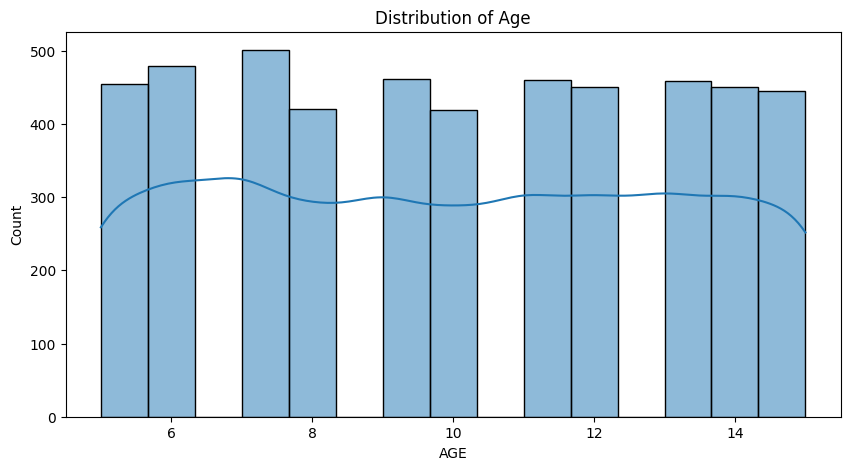

In [ ]:
#Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()

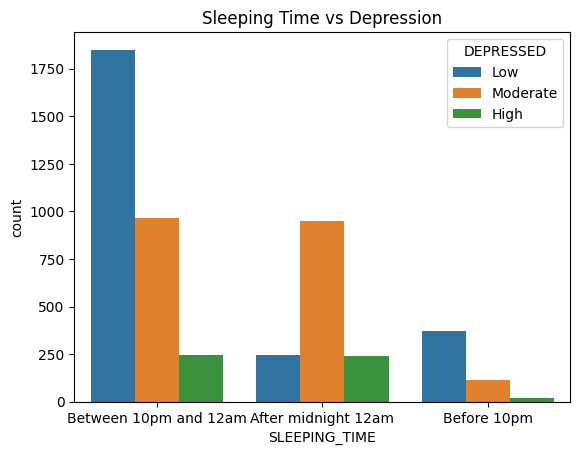

In [ ]:
# Bar plot to compare Sleeping_Time vs Depression
sns.countplot(x='SLEEPING_TIME', hue='DEPRESSED', data=df)
plt.title("Sleeping Time vs Depression")
plt.show()


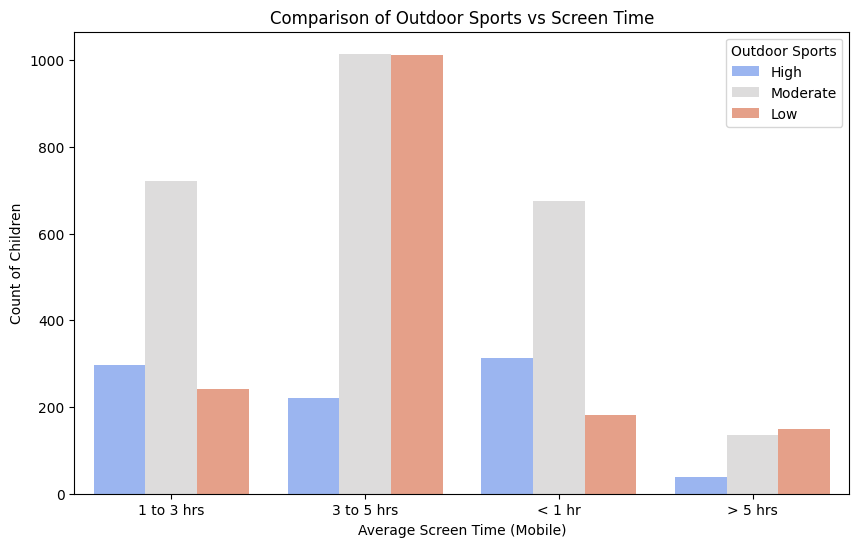

In [ ]:
# Grouped Bar Chart: Outdoor Sports vs Screen Time
plt.figure(figsize=(10, 6))
sns.countplot(x='PHONE_SCREEN_TIME',
              hue='OUTDOOR_SPORTS',
              data=df,
              palette='coolwarm')
plt.title('Comparison of Outdoor Sports vs Screen Time')
plt.xlabel('Average Screen Time (Mobile)')
plt.ylabel('Count of Children')
plt.legend(title='Outdoor Sports', loc='upper right')
plt.show()


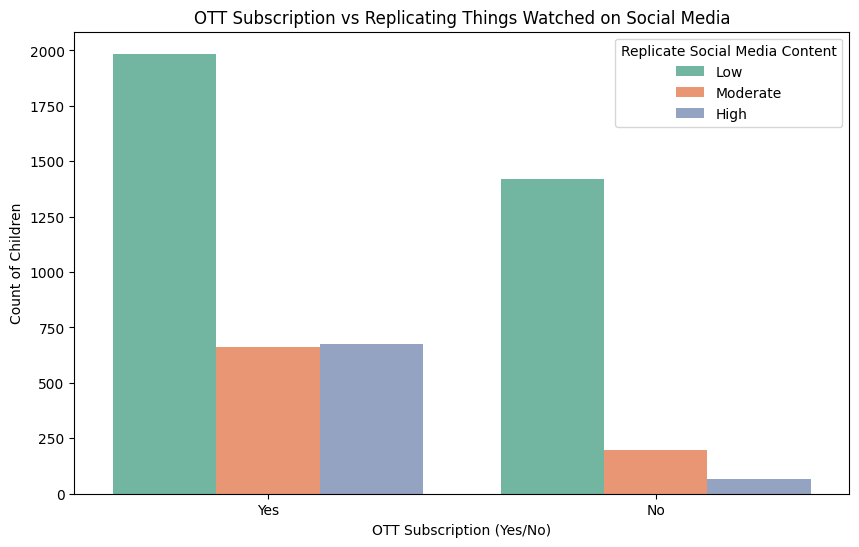

In [ ]:
# Grouped Bar Chart: OTT Subscription vs Replicate Things Watched on Social Media
plt.figure(figsize=(10, 6))

# Creating a grouped bar plot
sns.countplot(x='OTT_SUBSCRIPTION',
              hue='REPLICATE_SOCIAL_MEDIA',
              data=df,
              palette='Set2')

plt.title('OTT Subscription vs Replicating Things Watched on Social Media')
plt.xlabel('OTT Subscription (Yes/No)')
plt.ylabel('Count of Children')
plt.legend(title='Replicate Social Media Content', loc='upper right')
plt.show()


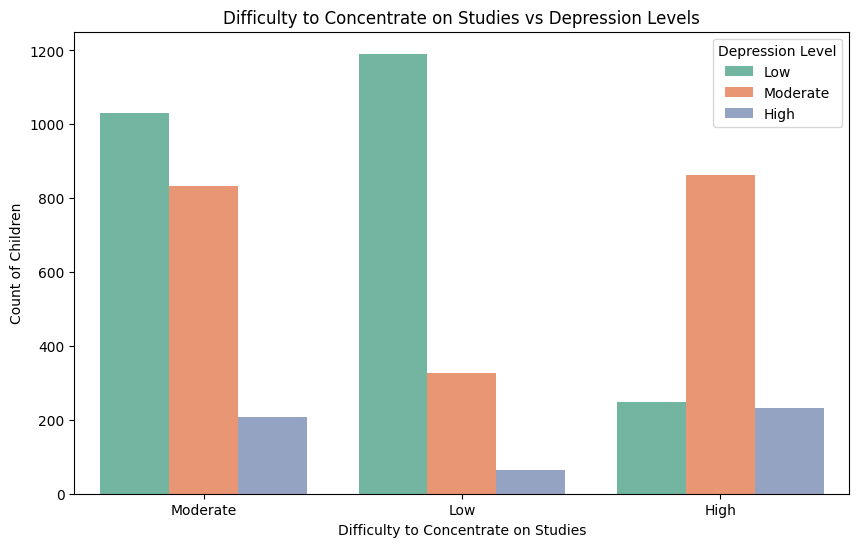

In [ ]:
# Grouped Bar Chart: Difficulty to Concentrate on Studies vs Depression
plt.figure(figsize=(10, 6))

# Creating a grouped bar plot
sns.countplot(x='CONCENTARTION',
              hue='DEPRESSED',
              data=df,
              palette='Set2')

plt.title('Difficulty to Concentrate on Studies vs Depression Levels')
plt.xlabel('Difficulty to Concentrate on Studies')
plt.ylabel('Count of Children')
plt.legend(title='Depression Level', loc='upper right')
plt.show()


In [ ]:
# Select the relevant columns for correlation analysis
correlation_df = df[['AGE', 'OUTDOOR_SPORTS', 'CONCENTARTION',
                     'SLEEP_ISSUES', 'REPLICATE_SOCIAL_MEDIA',
                     'DEPRESSED']]

# Convert categorical columns (if needed) to numerical format (High -> 2, Moderate -> 1, Low -> 0)
correlation_df['OUTDOOR_SPORTS'] = correlation_df['OUTDOOR_SPORTS'].map({'High': 2, 'Moderate': 1, 'Low': 0})
correlation_df['CONCENTARTION'] = correlation_df['CONCENTARTION'].map({'High': 2, 'Moderate': 1, 'Low': 0})
correlation_df['SLEEP_ISSUES'] = correlation_df['SLEEP_ISSUES'].map({'High': 2, 'Moderate': 1, 'Low': 0})
correlation_df['REPLICATE_SOCIAL_MEDIA'] = correlation_df['REPLICATE_SOCIAL_MEDIA'].map({'High': 2, 'Moderate': 1, 'Low': 0})
correlation_df['DEPRESSED'] = correlation_df['DEPRESSED'].map({'High': 2, 'Moderate': 1, 'Low': 0})

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Show correlation of all features with 'Depressed or worried due to constant social media use_High'
depression_correlation = correlation_matrix['DEPRESSED']
print(depression_correlation)


AGE                       0.310492
OUTDOOR_SPORTS           -0.336180
CONCENTARTION             0.400328
SLEEP_ISSUES              0.388315
REPLICATE_SOCIAL_MEDIA    0.334770
DEPRESSED                 1.000000
Name: DEPRESSED, dtype: float64


<ipython-input-12-9621d223ee65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df['OUTDOOR_SPORTS'] = correlation_df['OUTDOOR_SPORTS'].map({'High': 2, 'Moderate': 1, 'Low': 0})
<ipython-input-12-9621d223ee65>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df['CONCENTARTION'] = correlation_df['CONCENTARTION'].map({'High': 2, 'Moderate': 1, 'Low': 0})
<ipython-input-12-9621d223ee65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<Figure size 1200x1000 with 0 Axes>

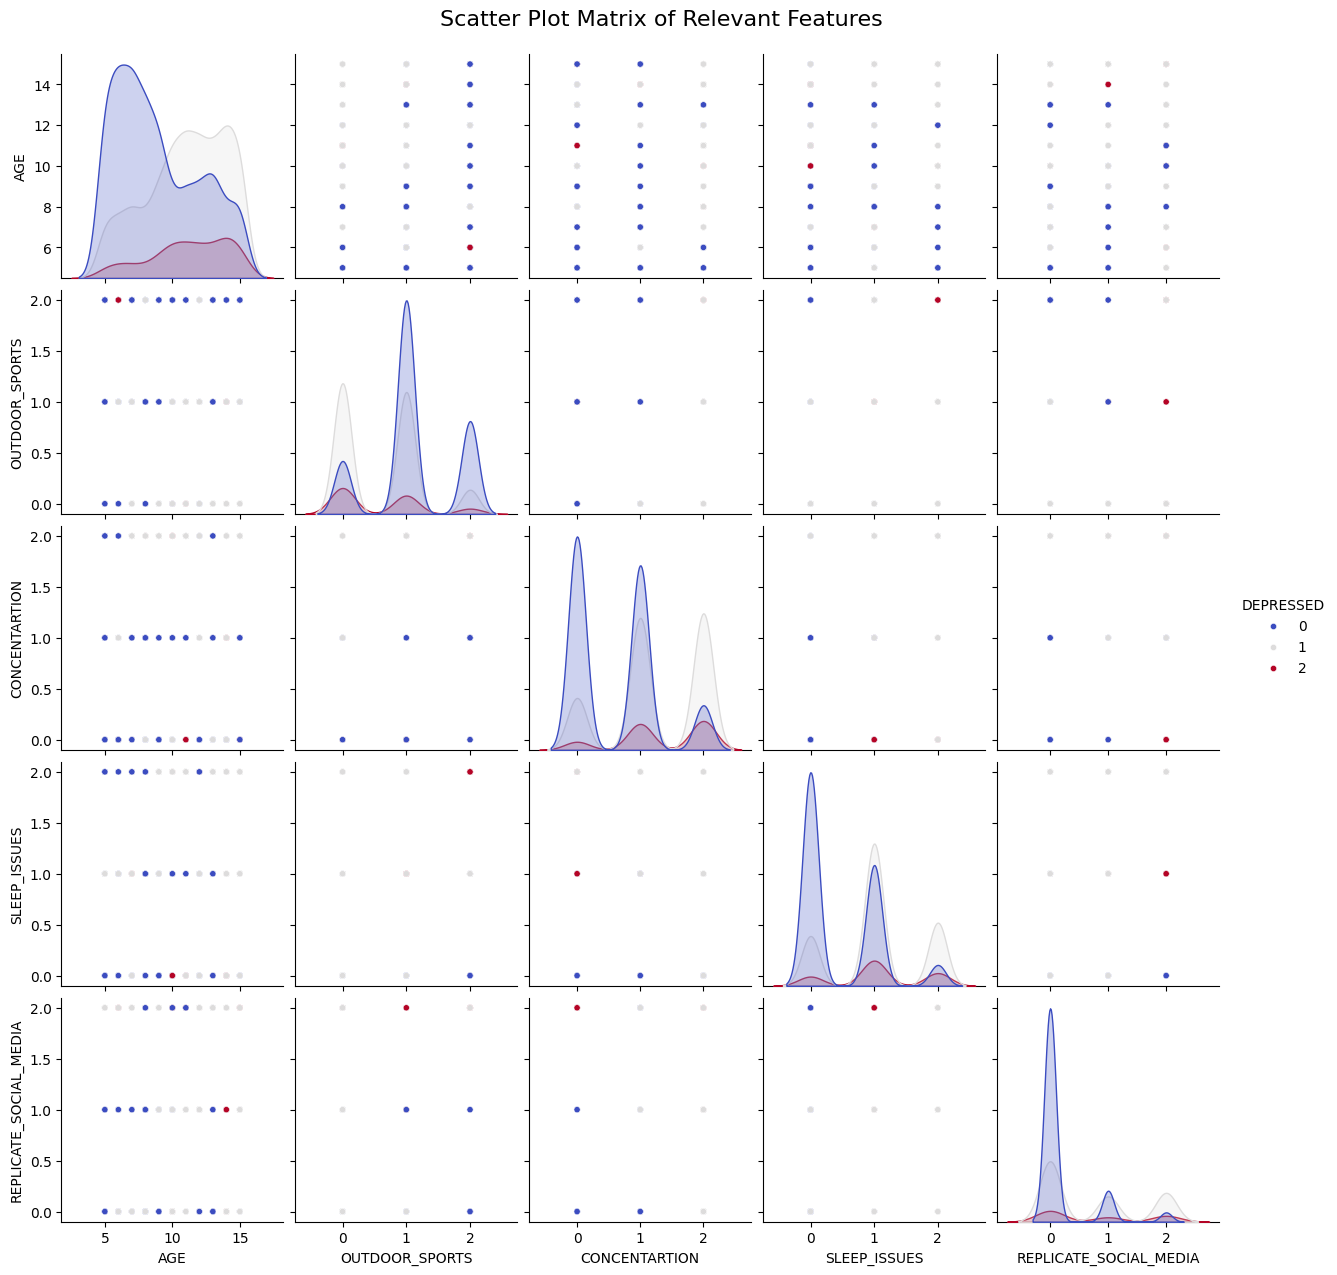

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the pair plot
scatter_matrix_df = correlation_df[['AGE', 'OUTDOOR_SPORTS', 'CONCENTARTION',
                                     'SLEEP_ISSUES', 'REPLICATE_SOCIAL_MEDIA',
                                     'DEPRESSED']]

# Set the size of the pair plot
plt.figure(figsize=(12, 10))

# Create a scatter plot matrix with labels
# Removed xlabel and ylabel from plot_kws and diag_kws
sns.pairplot(scatter_matrix_df, diag_kind='kde', markers='o', hue='DEPRESSED', palette='coolwarm',
             diag_kws={'fill':True},
             plot_kws={'s':20})

# Set the title
plt.suptitle('Scatter Plot Matrix of Relevant Features', y=1.02, fontsize=16)

# Show the plot
plt.show()


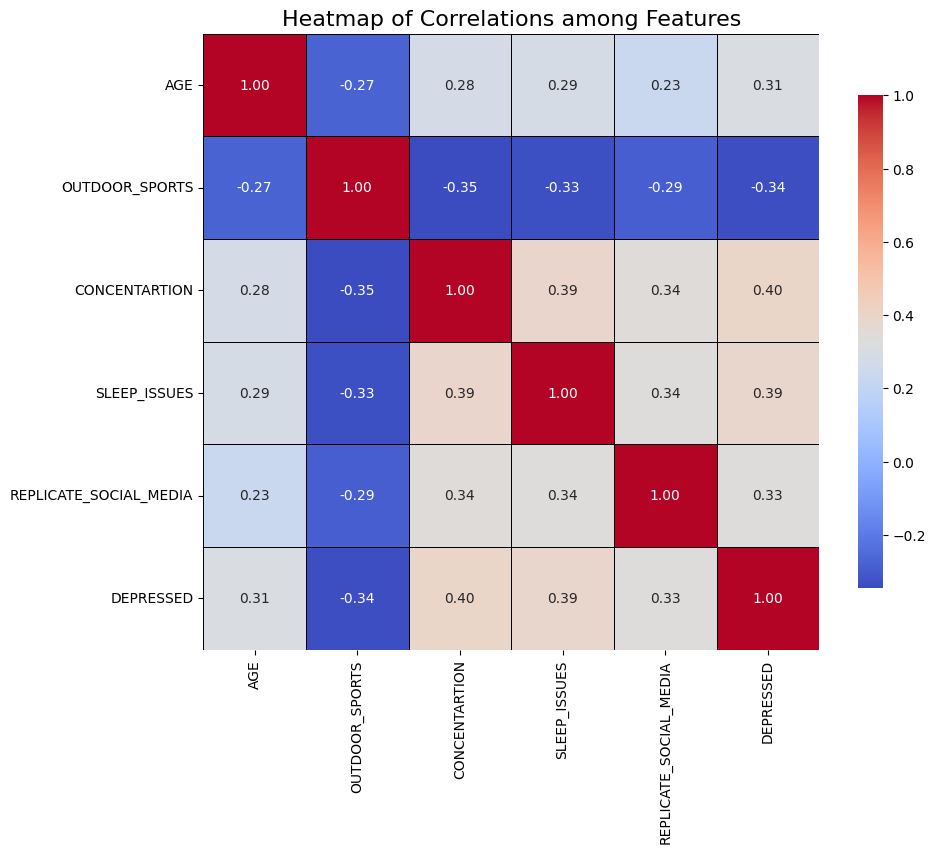

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = scatter_matrix_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8},
            linewidths=0.5, linecolor='black')

# Set the title
plt.title('Heatmap of Correlations among Features', fontsize=16)

# Show the plot
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# Handle categorical variables using Label Encoding/One-Hot Encoding
le = LabelEncoder()

# Encoding Gender and OTT Subscription as binary
df['GENDER'] = le.fit_transform(df['GENDER'])  # 0 for Female, 1 for Male
df['OTT_SUBSCRIPTION'] = le.fit_transform(df['OTT_SUBSCRIPTION'])  # 0 for No, 1 for Yes


In [ ]:
# Strip any leading or trailing whitespace characters from the column names
df.columns = df.columns.str.strip()


In [ ]:
# Encoding other categorical variables
df = pd.get_dummies(df, columns=[
    'SCHOOL_SECTION','PERSONAL_SMARTPHONE','TELEVISION_SCREEN_TIME','TELEVISION_CONTENT', 'SOCIAL_MEDIA_PLATFORM','PHONE_SCREEN_TIME',
     'SOCIAL_MEDIA_CONTENT','MOBILE_GAMES','SLEEPING_TIME','WAKEUP_TIME','OUTDOOR_SPORTS','SLEEP_ISSUES','DISTRACTION_DURING_SLEEPING',
     'EYES_STRAINED','SPECTACLES','SPECTACLE_NUMBER','RESTLESS','DISTRACTION_DURING_SEARCHING','CONCENTARTION','DEPRESSED','ANXIETY','BEHAVIOURAL_CHANGES',
     'REPLICATE_SOCIAL_MEDIA'
])


In [ ]:
# Create the target variable based on the three columns DEPRESSED_High, DEPRESSED_Moderate, DEPRESSED_Low
# Assuming that each row has only one of these values as 1 and the rest as 0

def create_depression_label(row):
    if row['DEPRESSED_High'] == 1:
        return 'High'
    elif row['DEPRESSED_Moderate'] == 1:
        return 'Moderate'
    elif row['DEPRESSED_Low'] == 1:
        return 'Low'
    else:
        return 'Unknown'

In [ ]:
# Apply this function to create a single target column
df['Depression'] = df.apply(create_depression_label, axis=1)


In [ ]:
# Drop the individual DEPRESSED columns after creating the target variable
df.drop(['DEPRESSED_High', 'DEPRESSED_Moderate', 'DEPRESSED_Low'], axis=1, inplace=True)

In [ ]:
#Handling Imbalanced Data using SMOTE
X = df.drop(['Depression'], axis=1)
y = df['Depression']

In [ ]:
# Check class distribution
print("\nClass Distribution Before SMOTE:")
print(y.value_counts())

# Apply SMOTE for multi-class classification
smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_sm).value_counts())



Class Distribution Before SMOTE:
Depression
Low         2470
Moderate    2025
High         505
Name: count, dtype: int64

Class Distribution After SMOTE:
Depression
Low         2470
Moderate    2470
High        2470
Name: count, dtype: int64


In [ ]:
# Data Preprocessing (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

# Create a stratified split with 80% training and 20% testing
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(stratified_split.split(X_scaled, y_sm))

# Create training and testing sets
X_train, X_test = X_scaled[train_index], X_scaled[test_index]
y_train, y_test = y_sm[train_index], y_sm[test_index]


In [ ]:
# Logistic Regression for multi-class classification
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Support Vector Machine (SVM) for multi-class classification
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance Metrics:")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # For multi-class
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Evaluate all models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svc, "SVM")


Logistic Regression Performance Metrics:
Accuracy: 0.7571
Precision: 0.7543
Recall: 0.7571
Confusion Matrix:
[[407  18  69]
 [  2 413  79]
 [ 84 108 302]]

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.82      0.82       494
         Low       0.77      0.84      0.80       494
    Moderate       0.67      0.61      0.64       494

    accuracy                           0.76      1482
   macro avg       0.75      0.76      0.75      1482
weighted avg       0.75      0.76      0.75      1482


Decision Tree Performance Metrics:
Accuracy: 0.6856
Precision: 0.6833
Recall: 0.6856
Confusion Matrix:
[[403  18  73]
 [ 41 330 123]
 [ 97 114 283]]

Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.82      0.78       494
         Low       0.71      0.67      0.69       494
    Moderate       0.59      0.57      0.58       494

    accuracy                           0.69    

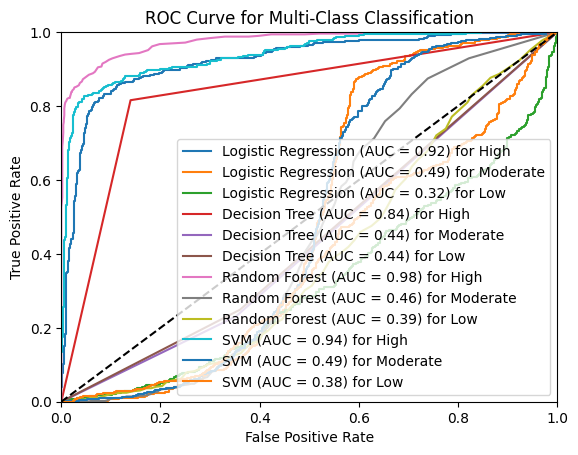

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'Depression' has three classes: 'High', 'Moderate', 'Low'
classes = ['High', 'Moderate', 'Low']

# Binarize the output
y_bin = label_binarize(y_test, classes=classes)
n_classes = y_bin.shape[1]

# Initialize the figure
plt.figure()

# Logistic Regression ROC Curve
y_prob_logreg = log_reg.predict_proba(X_test)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_logreg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f}) for {classes[i]}')

# Decision Tree ROC Curve
y_prob_dt = dt.predict_proba(X_test)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f}) for {classes[i]}')

# Random Forest ROC Curve
y_prob_rf = rf.predict_proba(X_test)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f}) for {classes[i]}')

# SVM ROC Curve
y_prob_svc = svc.predict_proba(X_test)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_svc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f}) for {classes[i]}')

# Plotting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()
